## Pernyataan Masalah
Apakah terdapat perbedaan signifikan dalam performa perjalanan antara dua penyedia layanan LPEP di NYC? Performa perjalanan dapat diukur dari beberapa aspek, termasuk durasi perjalanan, jarak perjalanan, jumlah penumpang, total jumlah yang dikenakan kepada penumpang, dan metode pembayaran yang digunakan.


## Data
Untuk menjawab masalah diatas, kita akan menganalisa data perjalanan Taxi di New York City yang sudah dikumpulkan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

Ada 20 kolom dalam dataset NYC TLC Trip Record, yaitu:
1.VendorID yang berisi nama perusahaan
    1 = Creative Mobile Technologies, LLC.
    2 = VeriFone Inc.

2. lpep_pickup_datetime yang berisi tanggal dan waktu kapan pelanggan naik.
3. lpep_dropoff_datetime  yang berisi tanggal dan waktu kapan pelanggan turun
4. Passenger_count berisi berapa banyak penumpang dalam 1 perjalanan.
5. Trip_distance seberapa jauh perjalanan dalam miles
6. PULocationID TLC Taxi Zone dimana meter taxi dimulai
7. DOLocationID TLC Taxi Zone dimana meter taxi selesai
6. RateCodeID The final rate code is in effect at the end of the trip.
    1 = Standard rate
    2 =JFK
    3 =Newark
    4 =Nassau or Westchester
    5 =Negotiated fare
    6 =Group ride

7. Store_and_fwd_flag This flag indicates whether the trip record was held
in the vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did
not have a connection to the server.
Y = store and forward trip
N = not a store and forward trip

8. Payment_type A numeric code signifying how the passenger paid for the trip.
    1 = Credit card
    2 = Cash
    3 = No charge
    4 = Dispute
    5 = Unknown
    6 = Voided trip

9.Fare_amount The time-and-distance fare is calculated by the
meter. Extra Miscellaneous extras and surcharges.
Currently, this only includes the $0.50 and $1 rush
hour and overnight charges.

9.MTA_tax $0.50 MTA tax that is automatically triggered based on the metered rate in use.

10. Improvement_surcharge $0.30 improvement surcharge assessed on hailed

trips at the flag
drop. The improvement surcharge began being
levied in 2015.

11.Tip_amount This field is automatically populated for credit card

12.tips. Cash tips are not included.

13. Tolls_amount The total amount of all tolls paid in the trip.
Total_amount The total amount charged to passengers. Does not

include cash tips.

14.Trip_type A code indicating whether the trip was a street hail
or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.
1 = Street-hail
2 = Dispatch

Berikut 5 baris teratas dari dataset NYC TLC Trip Record

In [193]:
readCSV = pd.read_csv("NYC TLC Trip Record.csv")
df = pd.DataFrame(readCSV)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## Data Cleaning
Tahap pertama yaitu mengecek informasi pada dataset tersebut seperti berapa banyak kolom dan baris serta nama-namanya

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [196]:
missing_values = df.isnull().sum()
print(missing_values)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [204]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Terlihat bahwa terdapat missing value di beberapa kolom yaitu,


In [166]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.966667


In [167]:
df['trip_distance'].fillna(df['trip_distance'].median(), inplace=True)
df['total_amount'].fillna(df['total_amount'].median(), inplace=True)
df['trip_duration'].fillna(df['trip_duration'].median(), inplace=True)
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0) & (df['trip_duration'] > 0)]


C:\Users\fbkby\AppData\Local\Temp\ipykernel_12744\186104826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_distance'].fillna(df['trip_distance'].median(), inplace=True)
C:\Users\fbkby\AppData\Local\Temp\ipykernel_12744\186104826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [194]:
missing_values = df.isnull().sum()
print(missing_values)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [181]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier dari kolom 'Trip_distance'
df = remove_outliers(df, 'trip_distance')

# Menghapus outlier dari kolom 'Total_amount'
df = remove_outliers(df, 'total_amount')

# Menghapus outlier dari kolom 'trip_duration'
df = remove_outliers(df, 'trip_duration')


# Menampilkan informasi data setelah menghapus outlier
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 48110 entries, 0 to 63886
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               48110 non-null  int64         
 1   lpep_pickup_datetime   48110 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  48110 non-null  datetime64[ns]
 3   store_and_fwd_flag     48110 non-null  object        
 4   RatecodeID             48110 non-null  float64       
 5   PULocationID           48110 non-null  int64         
 6   DOLocationID           48110 non-null  int64         
 7   passenger_count        48110 non-null  float64       
 8   trip_distance          48110 non-null  float64       
 9   fare_amount            48110 non-null  float64       
 10  extra                  48110 non-null  float64       
 11  mta_tax                48110 non-null  float64       
 12  tip_amount             48110 non-null  float64       
 13  tolls_

In [182]:
kolomNumerik = ['passenger_count', 'trip_distance', 'tip_amount', 'total_amount','trip_duration']

Q1 = df[kolomNumerik].quantile(0.25)
Q3 = df[kolomNumerik].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[kolomNumerik] < (Q1 - 1.5 * IQR)) | (df[kolomNumerik] > (Q3 + 1.5 * IQR)))
print( outliers.sum())


passenger_count    6896
trip_distance         0
tip_amount           69
total_amount          0
trip_duration         0
dtype: int64


In [96]:
VendorID1 = df[df['VendorID'] == 1]
VendorID2 = df[df['VendorID'] == 2]
display(VendorID1.head())
display(VendorID2.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.3,6.5,...,1.5,1.7,0.0,NaN,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.1,6.0,...,1.5,0.0,0.0,NaN,1.0,8.00,1.0,1.0,0.00,5.966667
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.3,15.0,...,0.0,0.0,0.0,NaN,0.0,15.00,1.0,2.0,0.00,8.866667
30,1,2023-01-01 00:24:01,2023-01-01 00:32:05,N,1.0,41,238,1.0,1.7,8.0,...,1.5,1.0,0.0,NaN,1.0,13.75,1.0,1.0,2.75,8.066667
65,1,2023-01-01 01:04:44,2023-01-01 01:11:23,N,1.0,74,41,1.0,1.1,6.5,...,1.5,1.5,0.0,NaN,1.0,10.00,1.0,1.0,0.00,6.650000


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,6.333333
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75,17.550000
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.2,...,0.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,12.950000


In [88]:
print(VendorID1.describe())
print(VendorID2.describe())

       VendorID           lpep_pickup_datetime          lpep_dropoff_datetime  \
count    5966.0                           5966                           5966   
mean        1.0  2023-01-16 21:24:28.060509440  2023-01-16 21:34:48.000503040   
min         1.0            2023-01-01 00:10:45            2023-01-01 00:19:03   
25%         1.0  2023-01-09 12:47:08.249999872  2023-01-09 12:58:03.249999872   
50%         1.0            2023-01-16 20:08:41     2023-01-16 20:14:26.500000   
75%         1.0            2023-01-24 15:54:42     2023-01-24 16:05:26.500000   
max         1.0            2023-01-31 23:45:10            2023-01-31 23:54:53   
std         0.0                            NaN                            NaN   

        RatecodeID  PULocationID  DOLocationID  passenger_count  \
count  5966.000000   5966.000000   5966.000000           5966.0   
mean      1.060007     91.827355    135.241033              1.0   
min       1.000000      3.000000      3.000000              1.0   
25

In [185]:
# t-test for trip distance after outlier removal
trip_dist_vendor1_clean = df[df['VendorID'] == 1]['trip_distance']
trip_dist_vendor2_clean = df[df['VendorID'] == 2]['trip_distance']
t_stat, p_val = ttest_ind(trip_dist_vendor1_clean, trip_dist_vendor2_clean)
print(f'Trip Distance (After Outlier Removal) - t-statistic: {t_stat}, p-value: {p_val}')

# t-test for total amount after outlier removal
total_amount_vendor1_clean = df[df['VendorID'] == 1]['total_amount']
total_amount_vendor2_clean = df[df['VendorID'] == 2]['total_amount']
t_stat, p_val = ttest_ind(total_amount_vendor1_clean, total_amount_vendor2_clean)
print(f'Total Amount (After Outlier Removal) - t-statistic: {t_stat}, p-value: {p_val}')

# t-test for trip duration after outlier removal
trip_duration_vendor1_clean = df[df['VendorID'] == 1]['trip_duration']
trip_duration_vendor2_clean = df[df['VendorID'] == 2]['trip_duration']
t_stat, p_val = ttest_ind(trip_duration_vendor1_clean, trip_duration_vendor2_clean)
print(f'Trip Duration (After Outlier Removal) - t-statistic: {t_stat}, p-value: {p_val}')

Trip Distance (After Outlier Removal) - t-statistic: 2.430109002413059, p-value: 0.015097914553469649
Total Amount (After Outlier Removal) - t-statistic: -11.381238986344039, p-value: 5.6649296671258796e-30
Trip Duration (After Outlier Removal) - t-statistic: 4.8268321253350255, p-value: 1.3914683811513787e-06


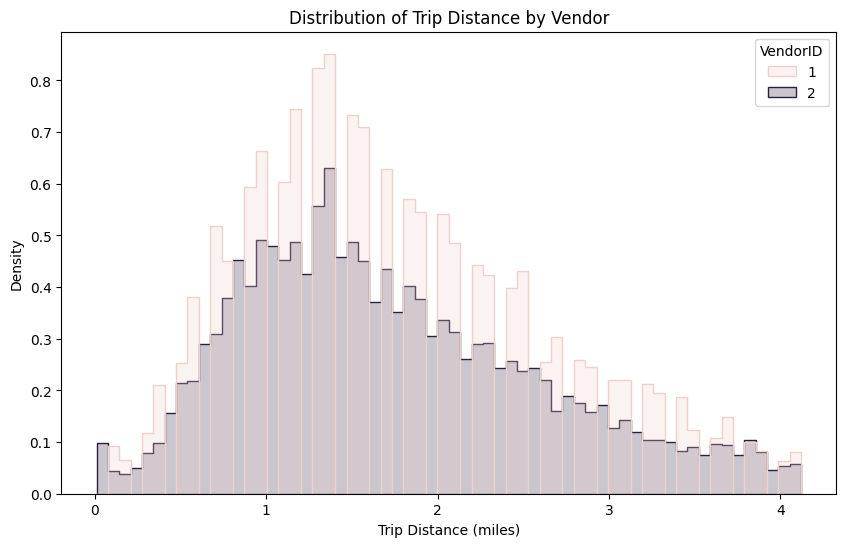

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trip_distance', hue='VendorID', element='step', stat='density', common_norm=False)
plt.title('Distribution of Trip Distance by Vendor')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.show()